# Live #013 - Neural Network for Regression, Classification and Time Series

# 0.0. Imports

In [274]:
import pandas as pd
import numpy  as np
from sklearn import preprocessing as pp
from sklearn import metrics as m
from sklearn import datasets as d
from sklearn import preprocessing as pp

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.utils import to_categorical

from matplotlib import pyplot as plt
import seaborn as sns

# Mean Squared Error

In [430]:
y_pred = np.arange( -10000, 10001 )
y_true = np.repeat( 100, len( y_pred ) )

error = ( y_true - y_pred )**2

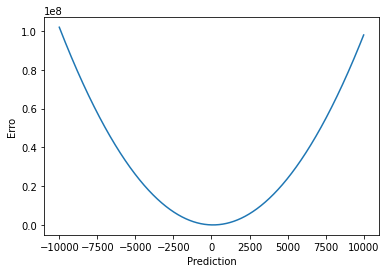

In [431]:
plt.plot( y_pred, error )
plt.ylabel( 'Erro' );
plt.xlabel( 'Prediction' );

# Mean Absolute Squared Error

In [432]:
y_pred = np.arange( -10000, 10001 )
y_true = np.repeat( 100, len( y_pred ) )

error = np.abs( y_true - y_pred )

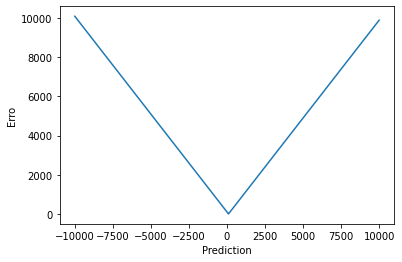

In [433]:
plt.plot( y_pred, error )
plt.ylabel( 'Erro' );
plt.xlabel( 'Prediction' );

# Mean Squared Logarithm Error

In [454]:
y_pred = np.arange( 0, 10000 )
y_true = np.repeat( 500, len( y_pred ) )

error = ( np.log1p( y_true + 1 ) - np.log1p( y_pred + 1 ) )**2

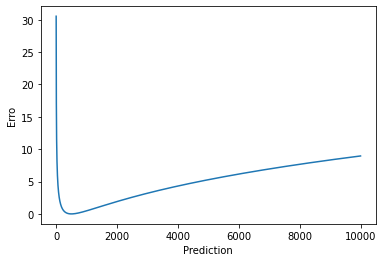

In [455]:
plt.plot( y_pred, error )
plt.ylabel( 'Erro' );
plt.xlabel( 'Prediction' );

## 0.1. Helper Functions

In [ ]:
# Helper function
def create_dataset( dataset, look_back=1 ):
    X, Y = [], []
    for i in range( len( dataset ) - look_back - 1 ):
        a = dataset[i:(i+look_back), 0]
        X.append( a )
        Y.append( dataset[i + look_back, 0] )
        
    return np.array( X ), np.array( Y )

# 1.0. Regression Problems

Train MSE: 0.0019491049461066723 - Test MSE: 0.0024749364238232374


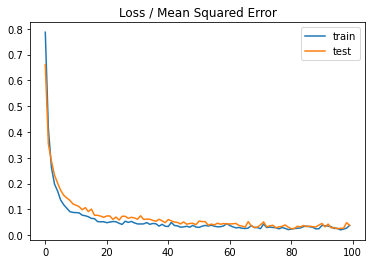

In [267]:
# generate regression dataset
X, y = d.make_regression( n_samples=1000, n_features=20, noise=0.1, random_state=1 )

# standardize dataset
ss = pp.StandardScaler()
X = ss.fit_transform( X )
y = ss.fit_transform( y.reshape( len( y ), 1 ) )[:, 0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add( Dense( 25, input_dim=20, activation='relu' ) )
model.add( Dense( 1, activation='linear' ) )

# compile model
opt = SGD( lr=0.01, momentum=0.9 )
#model.compile( loss='mean_squared_error', optimizer=opt )
#model.compile( loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
model.compile( loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit( trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0 )

# evaluate the model
_, train_mse = model.evaluate( trainX, trainy, verbose=0 )
_, test_mse = model.evaluate( testX, testy, verbose=0 )

print( 'Train MSE: {} - Test MSE: {}'.format( train_mse, test_mse ) )

# plot loss during training
plt.title( 'Loss / Mean Squared Error' )
plt.plot( history.history['loss'], label='train' )
plt.plot( history.history['val_loss'], label='test' )
plt.legend()
plt.show()

# 2.0. Classification Problems

Train Acc:0.35600000619888306 - Test Acc:0.36399999260902405


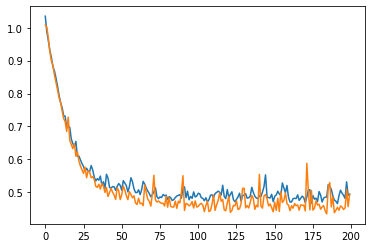

In [270]:
# generate 2d classification dataset
X, y = d.make_circles( n_samples=1000, noise=0.1, random_state=1 )

# if the loss function is hinge or squared hing loss
y[np.where( y == 0)] = -1

# split into train and test
n_train  = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add( Dense( 50, input_dim=2, activation='relu' ) )
#model.add( Dense( 1, activation='sigmoid' ) )
model.add( Dense( 1, activation='tanh' ) )

# compile model
opt = SGD( lr=0.01, momentum=0.9 )
#model.compile( loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'] )
model.compile( loss='hinge', optimizer=opt, metrics=['accuracy'] )
model.compile( loss='squared_hinge', optimizer=opt, metrics=['accuracy'] )

# fit model
history = model.fit( trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0 )

# evaluate model
_, train_acc = model.evaluate( trainX, trainy, verbose=0 )
_, test_acc = model.evaluate( testX, testy, verbose=0 )

print( 'Train Acc:{} - Test Acc:{}'.format( train_acc, test_acc ) )

# plot
plt.plot( history.history['loss'], label='training' )
plt.plot( history.history['val_loss'], label='test' )

# 3.0. Multi-Class Classification Problems

Train Acc:0.8220000267028809 - Test Acc:0.8240000009536743


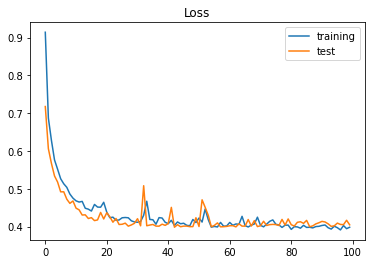

In [279]:
# generate 2d classification dataset
X, y = d.make_blobs( n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2 )

# one hot encode output variable
y = to_categorical( y )

# split into training and test dataset
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add( Dense( 50, input_dim=2, activation='relu' ) )
#model.add( Dense( 3, activation='sigmoid' ) )
model.add( Dense( 3, activation='softmax') )

# compile model
opt = SGD( lr=0.01, momentum=0.9 )
#model.compile( loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )
#model.compile( loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )
model.compile( loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'] )

# fit model
history = model.fit( trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0 )

# evaluate the model
_, train_acc = model.evaluate( trainX, trainy, verbose=0 )
_, test_acc = model.evaluate( testX, testy, verbose=0 )

print( 'Train Acc:{} - Test Acc:{}'.format( train_acc, test_acc ) )

# plot loss during training
plt.title( 'Loss' )
plt.plot( history.history['loss'], label='training')
plt.plot( history.history['val_loss'], label='test')
plt.legend()

# 4.0. Time Series Problemas


In [693]:
# read data
df = pd.read_csv( 'dataset/household_power_consumption.txt', delimiter=';', low_memory=False )

#df['date_time'] = pd.to_datetime( df['Date'] + ' ' + df['Time'] )

# convert string to numeric
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# drop na
df = df.dropna(subset=['Global_active_power'])

## feature engineering
#df['date_time'] = pd.to_datetime( df['date_time'] ) 
#
#df['year'] = df['date_time'].apply(lambda x: x.year)
#
#df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
#
#df['month'] = df['date_time'].apply(lambda x: x.month)
#
#df['day'] = df['date_time'].apply(lambda x: x.day)
#
## feature selection
#df = df[['date_time','Global_active_power', 'year','quarter','month','day']].sort_values( 'date_time', ascending=True)
#df = df.reset_index( drop=True )
#
#df['weekday'] = df.apply( lambda row: row['date_time'].weekday(),axis=1 )
#df['weekday'] = ( df['weekday'] < 5).astype( int )
#
#print( 'Number of rows and columns after removing missing values:', df.shape )
#print( 'The time series starts from: ', df.date_time.min() )
#print( 'The time series ends on: ', df.date_time.max() )

In [694]:
dataset = df['Global_active_power'].values
dataset = dataset.astype('float32')

# reshape dataframe
dataset = np.reshape( dataset, (-1, 1) )

# rescale dataframe
scaler = pp.MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform( dataset )

# split training and test dataframe
train_size = int( len( dataset )*0.80 )
test_size = len( dataset ) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 30

x_train, y_train = create_dataset( train, look_back )
x_test, y_test = create_dataset( test, look_back )

In [282]:
# reshape input to be [sample, time steps, features]
x_train = np.reshape( x_train, (x_train.shape[0], 1, x_train.shape[1] ) )
x_test = np.reshape( x_test, (x_test.shape[0], 1, x_test.shape[1] ) )

In [283]:
# model definition
model = Sequential()
model.add( LSTM( 100, input_shape=(x_train.shape[1], x_train.shape[2] ) ) )
model.add( Dropout( 0.2 ) )
model.add( Dense( 1 ) )

# model compile
model.compile( loss='mean_squared_error', optimizer='adam' )

# model training
es = EarlyStopping( monitor='val_loss', patience=10 )
history = model.fit( x_train, y_train, epochs=20, batch_size=70, validation_data=( x_test, y_test), 
                     callbacks=[es], verbose=0, shuffle=False )

In [284]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100)               52400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 101       
Total params: 52,501
Trainable params: 52,501
Non-trainable params: 0
_________________________________________________________________


In [285]:
# prediction
train_predict = model.predict( x_train )
test_predict = model.predict( x_test )

# invert predictions
train_predict = scaler.inverse_transform( train_predict )
y_train = scaler.inverse_transform( [y_train] )

test_predict = scaler.inverse_transform( test_predict )
y_test = scaler.inverse_transform( [y_test] )

In [287]:
mae_train = m.mean_absolute_error( y_train[0], yhat_train[:,0] )
rmse_train = np.sqrt( m.mean_squared_error( y_train[0], yhat_train[:,0] ) )

mae_test = m.mean_absolute_error( y_test[0], yhat_test[:,0] )
rmse_test = np.sqrt( m.mean_squared_error( y_test[0], yhat_test[:,0] ) )

print('Train Mean Absolute Error: {}'.format( mae_train ) )
print('Train Root Mean Squared Error: {}'.format( rmse_train ) )

print('Test Mean Absolute Error: {}'.format( mae_test ) )
print('Test Root Mean Squared Error: {}'.format( rmse_test ) )

Train Mean Absolute Error: 0.5136219961262584
Train Root Mean Squared Error: 0.9723626270076059
Test Mean Absolute Error: 0.9298880990592441
Test Root Mean Squared Error: 1.2790139823853135


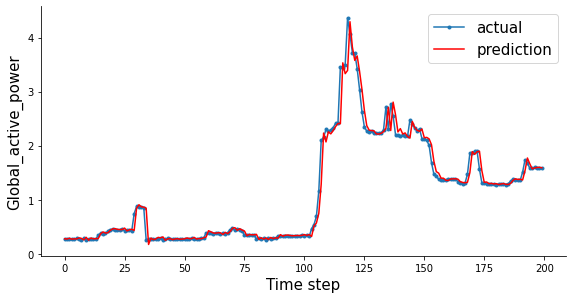

In [288]:
aa=[x for x in range(200)]

plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")

plt.tight_layout()
sns.despine(top=True)

plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();